In [9]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
import sys, os, tempfile
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from getdist import plots, MCSamples, loadMCSamples
import getdist, IPython
print('GetDist Version: %s, Matlotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True
import numpy as np
from matplotlib import ticker, cm, patches, pyplot
import fitsio as fio
import matplotlib.patches as patches
import emcee
import copy

GetDist Version: 1.1.2, Matlotlib version: 3.2.2


In [226]:
### Define plottings:

def plot_H0_Om(g,doAge=True,doTDSL=True,doTDCOSMO=False,doCMBlens=0,
               doKiDS=False,doDES=1,doSPT_SZ_TT=False,doSPT_SZ=False,doSNIa=True,doGammaRay=True,
               doCC=True,doCC_update=False,doBAOALL=False,doBAOH=True,doBAOL=True,doWMAP=True,
               doPlanck=True,doACTpol=False,doR19=True,doF20=False,doMCP=False,
               doCluster=False,doLSSjoint=False,doUCstds=False,
               doGuiding=True):
    alpha_scale=0.9  # overal alpha
    
    global N_contour
    # Cosmic Age:
    if doAge==True:
        N_contour+=1
        if doCMBlens==0:
            pos_Age=[55.2,0.43]
            #pos_Age=[64.5,0.53]
            text_Age=r'\textbf{Cosmic}'
            pos_Age2=[55.2,0.415]
            #pos_Age2=[64.7,0.515]
            text_Age2=r'\textbf{Age\,$^{\rm{\mathbf{M,L}}}$}'
        else:
            pos_Age=[55.7,0.523]
            text_Age=r'\textbf{\flushleft Cosmic\newline Age\,$^{\rm{\mathbf{M,L}}}$}'
        pos_guide = [[59.2,0.495],[62.13,0.486],[64.3,0.486]]
        #[[58.93,0.465],[60.15,0.514],[62.6,0.506]]  # position for the texts 
        rotats= [-55.5,-53.5,-52.8]; texts=[r'\textbf{13.5\,Gyr}',r'\textbf{13\,Gyr}',r'\textbf{12.5\,Gyr}']
        #[[58.9,0.5],[61.2,0.515],[63.7,0.507]]  # original position for the texts
        #rotats= [-53,-48,-48] original rotations
        lws=[3,2.5,2]; zorders=[2,2,3]; lss=['-','-.',':']; alpha1s=[0.8,0.9,0.9]; alpha2s=[0.15,0.1,0.1]
        Om_array = np.loadtxt('./chains_final/AgeGuides.txt')
        for i in [0,2]:
            plt.plot(Om_array[:,3],Om_array[:,i],color='orange',alpha=alpha1s[i],
                     ls=lss[i],linewidth=lws[i],zorder=zorders[i])
            plt.fill_between(Om_array[:,3],Om_array[:,i],color='orange',alpha=alpha2s[i],linewidth=0)
            plt.text(pos_guide[i][0],pos_guide[i][1],texts[i],fontsize=18, color='orange',rotation=rotats[i])
        plt.text(pos_Age[0], pos_Age[1],text_Age,fontsize=20, color='orange',rotation=0)
        plt.text(pos_Age2[0], pos_Age2[1],text_Age2,fontsize=20, color='orange',rotation=0)
                           
    # TDSL
    if doTDSL==True:
        N_contour+=1
        # 7 systems with the 7th estimated
        samples_load = np.loadtxt('./chains_new/TDSL_7_estimate.txt',delimiter=' ')
        samples_TDSL = MCSamples(samples=samples_load,names = ['H0','omegam'], labels = ['H_0','\Omega_m'])
        g.add_2d_contours(samples_TDSL, 'H0', 'omegam',alpha=0.85*alpha_scale,filled=True, color='#0165fc');
        text_pos=[68.8,0.48];rot=90
        if doF20==True:
            text_pos=[74.3,0.535];rot=0
        plt.text(text_pos[0],text_pos[1],r'\textbf{H0LiCOW}',fontsize=20,color='#0165fc',rotation=rot,zorder=20)
        

    if doTDCOSMO==True:
        N_contour+=1
        filename = 'TDCOSMO/JointAnalysis/tdcosmo_slacs_ifu_chainifu_separate_slope_flat_om_log_scatter.h5'
        backend = emcee.backends.HDFBackend(filename)
        mcmc_samples_slacs_ifu = backend.get_chain(discard=100, flat=True, thin=1)
        log_prob_slacs_ifu = backend.get_log_prob(discard=100, flat=True, thin=1)
        mcmc_samples_slacs_ifu_plot = copy.deepcopy(mcmc_samples_slacs_ifu)
        MCsamples_TDCOSMO = MCSamples(samples=mcmc_samples_slacs_ifu_plot,names = 
           ['H0','omegam','lambdai','sigami','lambdaifu','sigmaifu','alpha','arangea','sigamaa','sigamas'],
              labels = ['H_0','\Omega_{\\rm{m}}','\lambda_{int}','\sigma_{int}','\lambda_{ifu}','\sigma_{ifu}',
                     '\alpha','a','\sigama_a','\sigma_s'],ranges={'omegam':[0.05,0.6]})
        g.add_2d_contours(None,filled=True, contour_levels=np.array([1-0.95,1-0.68]),
                 density=MCsamples_TDCOSMO.get2DDensityGridData(0,1,smooth_scale_2D=0.5), color='gray'); 
        plt.text(67.1,0.53,r'\textbf{TDCOSMO}',fontsize=20,color='gray',rotation=0,zorder=20)    
        
    # CMB lens no BBN
    if doCMBlens==1:
        N_contour+=1
        g.add_2d_contours('base_lensing_DESpriors', 
                      'H0', 'omegam',alpha=0.85*alpha_scale,filled=True, color='hotpink');  
        txt_pos = [55.5,0.44]
    # CMB lens with BBN
    if doCMBlens==2:
        N_contour+=1
        g.add_2d_contours('base_lensing_DESpriors_CookeDH', 
                      'H0', 'omegam',alpha=0.85*alpha_scale,filled=True, color='hotpink',zorder=2); 
        txt_pos = [55.5,0.493]
    if doCMBlens!=0:
        plt.text(txt_pos[0],txt_pos[1],r'\textbf{CMB lens}',fontsize=20,color='hotpink',rotation=0,zorder=20)

    # KiDS
    if doKiDS==True:
        N_contour+=1
        KV, h_KV=fio.read('./Kids/KV450_fiducial.fits',header=True)
        samples_KiDS = MCSamples(samples=np.array([KV['Omega_m'],KV['h']]).T, 
                             names = ['omegam','h'],labels=['\Omega_m','h'],
                             weights=KV['weights'],label='KiDS')
        p = samples_KiDS.getParams() 
        samples_KiDS.addDerived(p.h*100, name='H0',label='H_0')
        g.add_2d_contours(samples_KiDS, 'H0', 'omegam',alpha=0.85*alpha_scale,filled=True, color='hotpink');  

    # DES no BBN
    if doDES==1:
        N_contour+=1
        samples_load = np.loadtxt('DES_public_long.txt',usecols=(0,1,28))
        names=np.loadtxt('./chains_LSS/DES_public_long_paramnames.txt',dtype=str,usecols=(0,1,28))
        samples_DES = MCSamples(samples=samples_load,names = names, labels = [r'\Omega_m', r'h', r'weight'],
                        weights=samples_load[:,-1],label='DES public')
        p = samples_DES.getParams() 
        samples_DES.addDerived(p.h*100, name='H0',label='H_0')
        g.add_2d_contours(samples_DES, 'H0', 'omegam',alpha=0.75*alpha_scale,filled=True, color='deepskyblue');  
        plt.text(59,0.3525,r'\textbf{DES\,$^{\rm{\mathbf{L}}}$}',fontsize=20,
                 color='deepskyblue',rotation=0,zorder=20)
    # DES with BBN
    if doDES==2:
        N_contour+=1
        g.add_2d_contours('DES_withBBN', 'H0', 'omegam',alpha=0.55*alpha_scale,
                          filled=True, color='deepskyblue',zorder=2);  
        plt.text(59,0.36,r'\textbf{DES\,$^{\rm{\mathbf{L}}}$}',fontsize=20,
                 color='deepskyblue',rotation=0,zorder=20)
        
    # SPT SZ TT
    if doSPT_SZ_TT==True:
        N_contour+=1
        g.add_2d_contours('SPT_SZ','H0','omegam',alpha=0.80,filled=True, color='pink',zorder=3); 
        plt.text(55.5,0.24,r'\textbf{SN P\,$^{\rm{\mathbf{L}}}$}',fontsize=20,color='red',zorder=20)
        
    # SPT SZ
    if doSPT_SZ==True:
        N_contour+=1
        nsample=11664
        samples_SPT = np.loadtxt('SPTcl_nuLCDM_chains.txt',usecols=(0,2,3,24,27))
        samples_SPT=samples_SPT[-nsample:-1,:]
        h_cut_low=0.55
        samples_SPT=samples_SPT[samples_SPT[:,2]>=h_cut_low,:]
        samples_SPT=samples_SPT[samples_SPT[:,1]>=0.0003,:]
        samples_SPT=samples_SPT[samples_SPT[:,1]<=0.0009,:]
        samples_SPT_SZ_cut = MCSamples(samples=samples_SPT,names=['omegam','omnuh2','h','sigma8','weight'], 
                        labels = [r'\Omega_m','\Omega_\nuh^2',r'h',r'\sigma_8',r'weight'],
                           weights=samples_SPT[:,-1],label='SPT SZ clustering',ranges={'h':(h_cut_low, None)})
        p = samples_SPT_SZ_cut.getParams() 
        samples_SPT_SZ_cut.addDerived(p.h*100, name='H0',label='H_0',range=[h_cut_low*100,None])
        g.add_2d_contours(samples_SPT_SZ_cut, 'H0', 'omegam',alpha=0.50,filled=True, color='lime',zorder=1); 
        plt.text(56.4,0.384,r'\textbf{SPT SZ\,$^{\rm{\mathbf{L}}}$}',fontsize=20,rotation=-18,color='lime',zorder=20)

    # Pantheon
    if doSNIa==True:
        N_contour+=1
        g.add_y_bands(0.298, 0.022, alpha1=0.5,alpha2=0.4, color='red')   # Quote the Pantheon number instead
        plt.axhline(y=0.298+0.022*2, color='red',lw=2.2,alpha=0.8)
        plt.axhline(y=0.298-0.022*2, color='red',lw=2.2,alpha=0.8)
        plt.text(55.5,0.24,r'\textbf{SN P\,$^{\rm{\mathbf{L}}}$}',fontsize=20,color='red',zorder=20)

    # gamma-ray
    if doGammaRay==True:
        N_contour+=1
        g.sample_analyser.ini.params.update({'ignore_rows': 0.3,'smooth_scale_2D':0.5})
        g.add_2d_contours('g_attenuation', 'H0', 'omegam',filled=True, color='darkgreen',alpha=0.8,zorder=2);   
        g.sample_analyser.ini.params.update({'ignore_rows': 0.3,'smooth_scale_2D':-1})
        plt.text(57.5,0.17,r'\textbf{$\gamma$-ray\,$^{\rm{\mathbf{L}}}$}',fontsize=25,
                 color='darkgreen',rotation=33,zorder=20)

    # Cosmic Chronometer
    if doCC==True:
        N_contour+=1
        if doCMBlens==0:
            pos_text=[59,0.44]
        else:
            pos_text=[64,0.47]
        samples_load = np.loadtxt('CC.txt')
        samples_CC = MCSamples(samples=samples_load,names=['H0','omegam'], 
                                     labels = [r'H_0', r'\Omega_{\rm{m}}'],label='CC') 
        g.add_2d_contours(samples_CC, 'H0', 'omegam',filled=True, color='#0165fc',zorder=1);  
        plt.text(pos_text[0],pos_text[1],r'\textbf{CC\,$^{\rm{\mathbf{L}}}$}',
                 fontsize=22,color='#0165fc',rotation=0,zorder=20)
    if doCC_update==True:
        N_contour+=1
        samples_load = np.loadtxt('CC_with_total.txt')
        samples_CCupdate = MCSamples(samples=samples_load,names=['H0','omegam'], 
                                     labels = [r'H_0', r'\Omega_{\rm{m}}'],label='CC')
        g.add_2d_contours(samples_CCupdate, 'H0', 'omegam',alpha=0.6,filled=True, color='hotpink',zorder=1);  
        plt.text(55.3,0.5,r'\textbf{CC\,$^{\rm{\mathbf{L}}}$}',fontsize=22,color='hotpink',rotation=0,zorder=20)
        #plt.text(55.3,0.378,r'\textbf{CC\,$^{\rm{\mathbf{L}}}$}',fontsize=22,color='hotpink',rotation=-60,zorder=20)
    
    # BAO all
    if doBAOALL==True:
        g.add_2d_contours('BAO_all', 'H0', 'omegam',alpha=0.7*alpha_scale,
                          filled=True, color='pink',zorder=2); 

    # BAO High
    if doBAOH==True:
        N_contour+=1
        g.add_2d_contours('BAO_la_repro', 'H0', 'omegam',alpha=alpha_scale,
                          filled=True, color='m',zorder=2); 
        #plt.text(75.64,0.215,r'\textbf{BAO High$^{\,\rm{\mathbf{H,M,L}}}$}',
        #         fontsize=20,color='darkgreen',rotation=-29,zorder=20)
        plt.text(66.2,0.161,r'\textbf{BAO Ly${\alpha}$+BBN$^{\,\rm{\mathbf{H,M,L}}}$}',fontsize=20,
                 color='m',rotation=-32,zorder=20)

    # BAO Low
    if doBAOL==True:
        N_contour+=1
        g.add_2d_contours('BAO_gal', 'H0', 'omegam',alpha=0.8*alpha_scale,filled=True, color='navy');   
        plt.text(73.9,0.46,r'\textbf{BAO Gal+BBN\,$^{\rm{\mathbf{H,M,L}}}$}',
                 fontsize=20,color='navy',rotation=21,zorder=20)

    # WMAP
    if doWMAP==True:
        N_contour+=1
        g.add_2d_contours('base_WMAP', 'H0', 'omegam',alpha=alpha_scale,filled=True, color='lime',zorder=3);   
        plt.text(70.73,0.2515,r'\textbf{WMAP}\,$^{\rm{\mathbf{H,M,L}}}$',
                 fontsize=18,color='lime',rotation=-29,zorder=20)

    # ACT pol
    if doACTpol==True:
        N_contour+=1
        g.add_2d_contours('ACTPol_lcdm', 'H0', 'omegam',
                          alpha=1*alpha_scale,filled=True, color='lime',zorder=3);    
        
    # Planck
    if doPlanck==True:
        N_contour+=1
        g.add_2d_contours('base_CamSpecHM_TTTEEE_lowl_lowE', 'H0', 'omegam',
                          alpha=1*alpha_scale,filled=True, color='k',zorder=3);
        plt.text(65.05,0.293,r'\textbf{Planck $^{\rm{\mathbf{H,M,L}}}$}',
                 fontsize=18,color='k',rotation=-43,zorder=20)    


    # Riess 2019  # Local measurement Riess 2019
    if doR19==True:
        N_contour+=1
        g.add_x_bands(74.03, 1.42, alpha1=0.6,alpha2=0.5, color='yellow',zorder=1)  
        plt.axvline(x=74.03+1.42*2, color='yellow',lw=2.2,alpha=0.7)
        plt.axvline(x=74.03-1.42*2, color='yellow',lw=2.2,alpha=0.7)
        plt.text(77,0.535,r'\textbf{CV SN\,$^{\rm{\mathbf{E}}}$}',fontsize=20,
                 color='goldenrod',rotation=0,zorder=20)

    # F 2020 # Local measurement Friedmann 2020
    if doF20==True:
        N_contour+=1
        g.add_x_bands(69.6, 1.88, alpha1=0.3,alpha2=0.3, color='yellow',zorder=2) 
        plt.axvline(x=69.6+1.88*2, color='yellow',lw=2.2,alpha=0.7)
        plt.axvline(x=69.6-1.88*2, color='yellow',lw=2.2,alpha=0.7)
        text_pos=[73.6,0.53]
        if doAge==False:
            text_pos=[65.2,0.48]
        plt.text(text_pos[0],text_pos[1],r'\textbf{TRGB SN\,$^{\rm{\mathbf{E}}}$}',
                 fontsize=20,color='goldenrod',rotation=0,zorder=20)    
        
    # MCP
    if doMCP==True:
        N_contour+=1
        g.add_x_bands(73.9, 3.0, alpha1=0.5,alpha2=0.3, color='pink',zorder=2) 
        plt.axvline(x=73.9+3.0*2, color='pink',lw=2.2,alpha=0.7)
        plt.axvline(x=73.9-3.0*2, color='pink',lw=2.2,alpha=0.7)
        plt.text(78,0.53,r'\textbf{MCP\,$^{\rm{\mathbf{E}}}$}',
                 fontsize=18,color='hotpink',rotation=0,zorder=20)
    
    
    # Cluster 1911.05083, Omh^0.2=0.24+-0.03, prior of 100Ωbh2 = 2.202 ± 0.045 was used
    if doCluster==True:
        H0_range=np.arange(55,85,0.1)
        Om_up1= (0.24+0.03)/(H0_range/100)**0.5
        Om_low1= (0.24-0.03)/(H0_range/100)**0.5
        Om_up2= (0.24+0.03*2)/(H0_range/100)**0.5
        Om_low2= (0.24-0.03*2)/(H0_range/100)**0.5
        plt.fill_between(H0_range, Om_low1,Om_up1, alpha=0.3, color='gray',linewidth=0)
        plt.fill_between(H0_range, Om_low2,Om_up2, alpha=0.3, color='gray',linewidth=0)
        plt.plot(H0_range,Om_low2, color='gray',lw=2.2,alpha=0.7)
        plt.plot(H0_range,Om_up2, color='gray',lw=2.2,alpha=0.7)
    
    # Joint LSS+BBN
    if doLSSjoint==True:
        g.add_2d_contours('CMBlens_DES_SZ_withBBNprior', 'H0', 'omegam',alpha=0.6,
                          filled=True, color='deepskyblue',zorder=2);
     
    # UC stds
    if doUCstds==True:
        filepath='.Plancktheta_BAO/All_BAO_SN_64_step3000.csv'
        names = ['zstar','rsH0', 'MH0','omegam','h','Deltazrec','omegabh2']    # put parameters here
        labels =  [r'z_*',r'r_{\rm{s}}H_0',r'\mathcal{M}',r'\Omega_{\rm{m}}',r'h',r'\Delta z_{dec}','\Omega_b h^2']
        samples_load_All_BAO_SN = np.loadtxt(filepath,delimiter=",")
        MCsamples_All_BAO_SN = MCSamples(samples=samples_load_All_BAO_SN,names = names, 
                                 labels = labels,ranges={'h':(0.45, 0.95)})
        p = MCsamples_All_BAO_SN.getParams() 
        MCsamples_All_BAO_SN.addDerived(p.h*100, name='H0', label=r'$H_0$',range=[45,95])
        g.add_2d_contours(MCsamples_All_BAO_SN, 'H0', 'omegam',filled=True,zorder=1,color='r');

      

    # Guiding circle; this is not a joint result
    if doGuiding==True:
        N_contour+=1
        plt.gca().add_patch(patches.Ellipse([68.5,0.3], width=4.05, 
                                    height=(4*(limits[3]-limits[2])/(limits[1]-limits[0])/figratio)
                                    , angle=0,color='w',ls=':',lw=5,fill=False,zorder=26))


def plot_local(H_mean,H_err,label,i):
    plt.errorbar(H_mean, 0.19+i*0.05,xerr=H_err,lw=14,fmt='o',color='yellow',zorder=30,capsize=10,capthick=0)
    plt.errorbar(H_mean, 0.19+i*0.05,xerr=H_err*2,lw=8,fmt='o',color='yellow',zorder=30,capsize=10,capthick=2)
    plt.text(H_mean,0.19+i*0.05+0.008,r'\textbf{'+label+'}',fontsize=18,color='yellow',zorder=30)




# Plot Constraints:

Removed no burn in
Removed no burn in


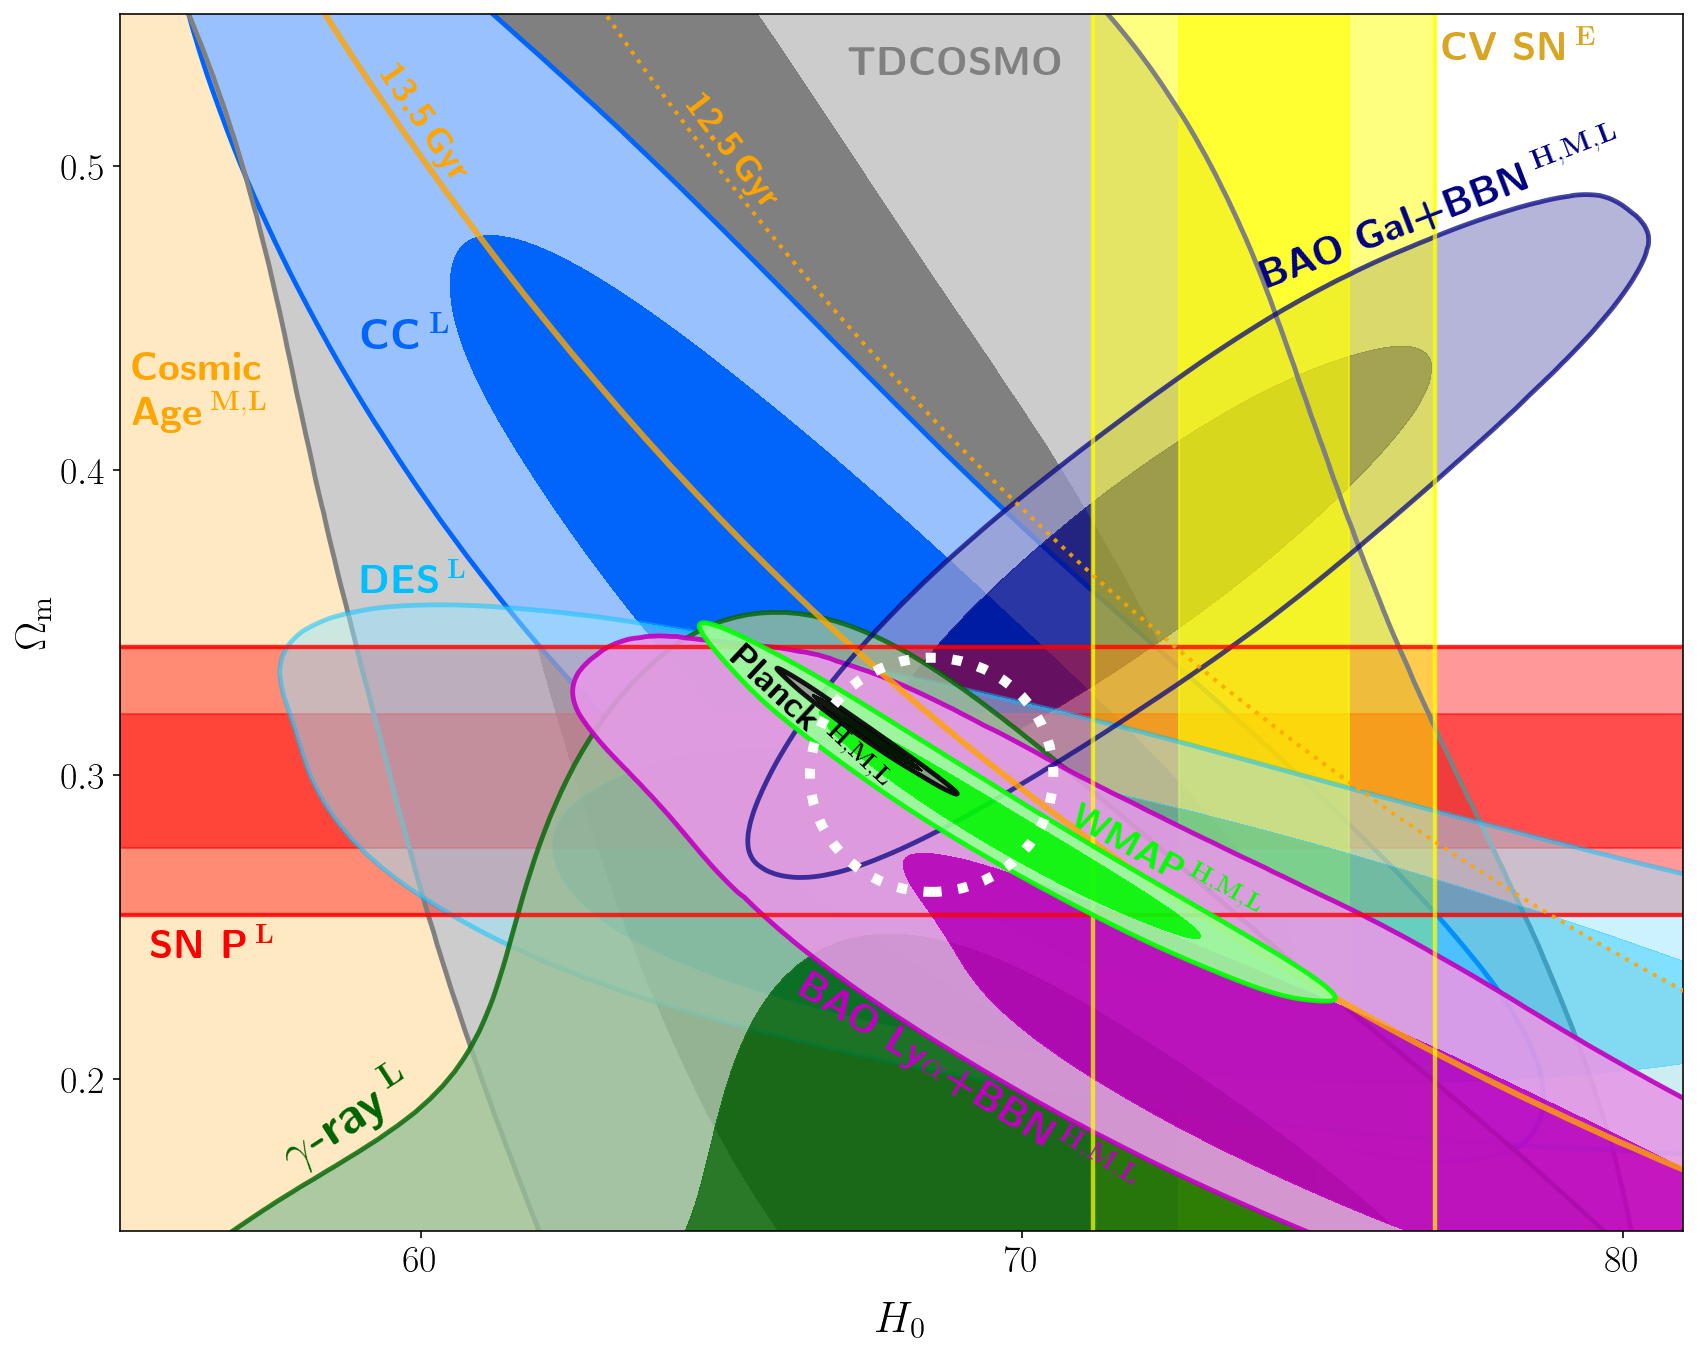

In [237]:
figratio=0.8
params = ['H0', 'omegam']
chains_dir0=os.path.join(os.getcwd(),'chains_final')
chains_dir1=os.path.join(os.getcwd(),'chains_new')
chains_dir2=os.path.join(os.getcwd(),'chains_LSS')

g=plots.get_single_plotter(chain_dir=[chains_dir0],
    analysis_settings={'ignore_rows': 0.3}, width_inch=14,ratio=figratio);
# Some Settings:
g.settings.alpha_factor_contour_lines =1
g.settings.axes_fontsize = 19; g.settings.lab_fontsize = 22
limits=[55, 81, 0.15, 0.55]
g.set_axes(lims=limits)   # axis limits
Pnames=getdist.paramnames.ParamList(names=params, labels=['$H_0$','$\Omega_{\\rm{m}}$'])
g.set_xlabel(Pnames.names[0]); g.set_ylabel(Pnames.names[1])


N_contour=0
plot_H0_Om(g=g,doAge=True,
           doTDSL=False,
           doTDCOSMO=True,
           doCMBlens=0,  # 0:no  1: without BBN    2: with BBN
           doKiDS=False,
           doDES=2,   # 0:no  1: without BBN    2: with BBN
           doSNIa=True,
           doGammaRay=True,
           doCC=True,
           doCC_update=False,
           doBAOALL=False,
           doBAOH=True,
           doBAOL=True,
           doWMAP=True,
           doPlanck=True,
           doACTpol=False,
           doSPT_SZ_TT=False,
           doSPT_SZ=False,
           doR19=True,
           doF20=False,
           doMCP=False,
           doCluster=False,
           doLSSjoint=False,
           doUCstds=False,
           doGuiding=True,)


H0_range=np.arange(50,85,0.1)
# Add the patch to the Axes
#plt.fill_between(H0_range, 0.1,0.6,color='gray',alpha=0.3,zorder=25)



#i=0
#for H_mean,H_err,label in [[69.6,1.88,'TRGB'],[70.5,4.1,'SBF'],[73.3,3.9,'Mira'],[73.9,3.0,'MCP'],
#                           [74.03,1.42,'CV SN'],[76.0,2.5,'TFR']]:
    #plot_local(H_mean,H_err,label,i)
#    i=i+1
#plt.errorbar(75.8, 0.33+6*0.02,lw=10,fmt='o',color='gold',zorder=30)
#plt.errorbar(75.95, 0.19+6*0.05,xerr=5.05,lw=14,color='yellow',zorder=30,capsize=10,capthick=0)
#plt.errorbar(75.95, 0.19+6*0.05,xerr=5.05*2,lw=8,color='yellow',zorder=30,capsize=10,capthick=2)
#plt.text(73,0.19+6*0.05+0.008,r'\textbf{SN II}',fontsize=18,color='yellow',zorder=30)


# Save file
FILESAVE=os.path.join(r'figures_PostPublication/',r'Om_H0_PostPublication.pdf')
g.export(FILESAVE)